# **Natural Language Processing with Python**
by [CSpanias](https://cspanias.github.io/aboutme/) - 01/2022

Content based on the [NLTK book](https://www.nltk.org/book/).

You can find Chapter 1 [here](https://www.nltk.org/book/ch01.html), my notes for Chapter 1 [here](https://github.com/CSpanias/nlp_resources/blob/main/NLTK_book/chapter_1/chapter1_languageProcessingAndPython.ipynb) as well as my version of the associated exercise solutions [here](https://github.com/CSpanias/nlp_resources/blob/main/NLTK_book/chapter_1/chapter1_exercises.ipynb).

This is a short "project" in which I included a __Textual Analysis__ based on NLTK Chapter's 1 materials.

# Topic Classification using Unsupervised Learning
by [CSpanias](https://cspanias.github.io/aboutme/), 2nd Week's Project for [Solving Business Problems with NLP](https://omdena.com/course/solving-business-problems-with-nlp/) by Omdena

# CONTENT
1. [Text Pre-Processing](#textpre)
2. [Textual Analysis](#textAnalysis)
3. [Vectorization - BoW & tf-idf](#vectorization)
4. [Topic Classification with Unsupervised Learning](#modelling)
    1. [LDA](#LDA)
    1. [NMF](#NMF)
    3. [SVD](#SVD)
5. [Conclusions](#conc)

<a name="textpre"></a>
# 1. Text Pre-Processing
1. [Import Text](#import)
2. [Remove Special Characaters](#re)
3. [Expand Contractions](#contractions)
4. [Tokenization](#tokenization)
5. [Lower-casing & Stopwords Removal](#lower)
6. [POS-Tagging](#postagging)
7. [Lemmatization](#lemma)

<a name="import"></a>
I chose to experiment with __Homer's Odyssey__, as it is a story I am familiar with (I am Greek!), and therefore I could use some __"domain expertise"__ in order to better interpret the results. 

You can find the __Plain Text UTF-8__ version of the text on the [Project Gutenberg website](https://www.gutenberg.org/ebooks/1727).

First, we will __import the text__, we will make sure that is of __class string__, and we will __take a look at the text's first few characters__ to get a feel of it.

In [5]:
# import text as string
with open(r"odyssey_homer.txt", encoding="utf8") as f:
    raw = f.read()
    
# check dtype
print(f"Variable 'raw' is of type: {type(raw)}\n")

# check text
print(f"First 1000 characters:\n\n{raw[:1000]}\n")

Variable 'raw' is of type: <class 'str'>

First 1000 characters:

The Project Gutenberg eBook of The Odyssey, by Homer

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: The Odyssey

Author: Homer

Translator: Samuel Butler

Release Date: April, 1999 [eBook #1727]
[Most recently updated: January 4, 2022]

Language: English


Produced by: Jim Tinsley and David Widger

*** START OF THE PROJECT GUTENBERG EBOOK THE ODYSSEY ***

[Illustration]




The Odyssey

by Homer

rendered into English prose for the use of those who cannot read the
original

Contents

 PREFACE TO FIRST EDITION
 PREFACE TO SE

<a name="re"></a>
As we can see from the output above, __the text is already fairly "clean"__, thus, we will have to perform just a few pre-processing steps to __get it to the desired final form__. 

We will start by __removing special characters__, i.e. anything else than letters or numbers, using __regular expressions__. 

In [6]:
import re

# remove special chars
text = re.sub('[^\w\d]+', ' ', raw)

# check that it worked
print(f"Initial text without special chars:\n\n{text[:1000]}")

Initial text without special chars:

The Project Gutenberg eBook of The Odyssey by Homer This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever You may copy it give it away or re use it under the terms of the Project Gutenberg License included with this eBook or online at www gutenberg org If you are not located in the United States you will have to check the laws of the country where you are located before using this eBook Title The Odyssey Author Homer Translator Samuel Butler Release Date April 1999 eBook 1727 Most recently updated January 4 2022 Language English Produced by Jim Tinsley and David Widger START OF THE PROJECT GUTENBERG EBOOK THE ODYSSEY Illustration The Odyssey by Homer rendered into English prose for the use of those who cannot read the original Contents PREFACE TO FIRST EDITION PREFACE TO SECOND EDITION THE ODYSSEY BOOK I BOOK II BOOK III BOOK IV BOOK V BOOK VI BOOK VI

<a name="contractions"></a>
We will then proceed to __expand any occurence of contracted word__ such as "it's" to "it is".

In [7]:
import contractions

expanded_words = []
# split text on empty spaces
for word in text.split():
  # expand shortened words
  expanded_words.append(contractions.fix(word))

# join text back as string
expanded_text = ' '.join(expanded_words)

# check that it worked
print(f"Initial text without special chars:\n\n{expanded_text[:1000]}")

Initial text without special chars:

The Project Gutenberg eBook of The Odyssey by Homer This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever You may copy it give it away or re use it under the terms of the Project Gutenberg License included with this eBook or online at www gutenberg org If you are not located in the United States you will have to check the laws of the country where you are located before using this eBook Title The Odyssey Author Homer Translator Samuel Butler Release Date April 1999 eBook 1727 Most recently updated January 4 2022 Language English Produced by Jim Tinsley and David Widger START OF THE PROJECT GUTENBERG EBOOK THE ODYSSEY Illustration The Odyssey by Homer rendered into English prose for the use of those who cannot read the original Contents PREFACE TO FIRST EDITION PREFACE TO SECOND EDITION THE ODYSSEY BOOK I BOOK II BOOK III BOOK IV BOOK V BOOK VI BOOK VI

<a name="tokenization"></a>
We can see that the text includes no characters other than letters or numbers, thus, we can perform __tokenization__, i.e. convert it from a single string to a list of tokens. 

In [8]:
from nltk.tokenize import word_tokenize

# tokenize text
tokens = word_tokenize(expanded_text)

print(f"Number of tokens: {len(tokens)}.\n")

print(f"First 20 tokens:\n\n{tokens[:20]}\n")

Number of tokens: 133912.

First 20 tokens:

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'The', 'Odyssey', 'by', 'Homer', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the']



<a name="lower"></a>
Next, we will __lower-case all words__, so we can __remove stopwords__ on the subsequent step. 

In [9]:
# lower case words
tokens = [w.lower() for w in tokens]
print(f"First 20 tokens:\n\n{tokens[:20]}")

First 20 tokens:

['the', 'project', 'gutenberg', 'ebook', 'of', 'the', 'odyssey', 'by', 'homer', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the']


In [10]:
from nltk.corpus import stopwords

# define stopwords list
sw = set(stopwords.words('english'))

# remove stopwords
tokens = [token for token in tokens if token not in sw]

print(f"Number of tokens without stopwords: {len(tokens)}.")

print(f"First 20 tokens:\n\n{tokens[:20]}")

print(f"First 20 tokens sorted:\n\n{sorted(tokens)[:20]}")

Number of tokens without stopwords: 60360.
First 20 tokens:

['project', 'gutenberg', 'ebook', 'odyssey', 'homer', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'states', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give']
First 20 tokens sorted:

['000', '000', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


As we can see from the output above, the __sorted tokens__ gives us a lot of number that __probably represent book chapters, sections__, etc., so nothing meaningful.

In [11]:
tokens = [w for w in tokens if w.isalpha()]

print(f"First 20 tokens sorted:\n\n{sorted(tokens)[:20]}")

First 20 tokens sorted:

['abandoned', 'abandoned', 'abated', 'abetting', 'abhorred', 'abide', 'abide', 'abides', 'abiding', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able', 'able']


<a name="postagging"></a>
The list with the sorted tokens now seem a lot more useful!

We must __tag our tokens with their respective Part-of-Speech__ for better results on the lemmatization process that will follow.

In [12]:
from nltk import pos_tag

# POS tagging
tagged_tokens = pos_tag(tokens)

print(f"POS-tagged tokens:\n\n{tagged_tokens[:20]}")

POS-tagged tokens:

[('project', 'NN'), ('gutenberg', 'NN'), ('ebook', 'NN'), ('odyssey', 'JJ'), ('homer', 'NN'), ('ebook', 'NN'), ('use', 'NN'), ('anyone', 'NN'), ('anywhere', 'RB'), ('united', 'JJ'), ('states', 'NNS'), ('parts', 'NNS'), ('world', 'NN'), ('cost', 'NN'), ('almost', 'RB'), ('restrictions', 'NNS'), ('whatsoever', 'VBP'), ('may', 'MD'), ('copy', 'VB'), ('give', 'VB')]


In [13]:
# convert tags to WordNet form
from nltk.corpus import wordnet

def pos_tag_wordnet(tagged_tokens):
    """Convert POS-tagged tokens to WordNet form tags."""
    tag_map = {'j': wordnet.ADJ, 'v': wordnet.VERB, 'n': wordnet.NOUN, 'r': wordnet.ADV}
    # if a word does not belong to one of the 4 categories make it a NOUN
    new_tagged_tokens = [(word, tag_map.get(tag[0].lower(), wordnet.NOUN)) for word, tag in tagged_tokens]
    return new_tagged_tokens

# call function
wordnet_tokens = pos_tag_wordnet(tagged_tokens)
print(f"WordNet-tagged tokens:\n\n{wordnet_tokens[:20]}")

WordNet-tagged tokens:

[('project', 'n'), ('gutenberg', 'n'), ('ebook', 'n'), ('odyssey', 'a'), ('homer', 'n'), ('ebook', 'n'), ('use', 'n'), ('anyone', 'n'), ('anywhere', 'r'), ('united', 'a'), ('states', 'n'), ('parts', 'n'), ('world', 'n'), ('cost', 'n'), ('almost', 'r'), ('restrictions', 'n'), ('whatsoever', 'v'), ('may', 'n'), ('copy', 'v'), ('give', 'v')]


<a name="lemma"></a>
The final step of pre-processing would be to __lemmatize__ our tokens.

In [14]:
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

# lemmatize tokens
tokens = [wnl.lemmatize(word, tag) for word, tag in wordnet_tokens]

# check that it worked
print(f"Lemmatized text:\n{tokens[:20]}")

Lemmatized text:
['project', 'gutenberg', 'ebook', 'odyssey', 'homer', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'state', 'part', 'world', 'cost', 'almost', 'restriction', 'whatsoever', 'may', 'copy', 'give']


Our text has been __successfuly pre-processed__:
1. Special characaters removed
1. Contractions expanded
1. String tokenized
1. Words lower-cased
1. Stopwords removed
1. Numbers removed
1. Words POS-Tagged
1. Words lemmatizated

<a name="textAnalysis"></a>
# 2. Textual Analysis

Prior feeding our tokens to ML models for clustering, we can also perform a __basic textual analysis__ using NLTK, to get a better feel of the text. 

For example, we can calculate the __lexical richness__ of the text.

__Note:__ Analysis based on [NLTK book](https://www.nltk.org/book/) (Chapter 1).

In [15]:
# check length & vocab
print(f"Number of tokens: {len(tokens)}\n\nNumber of unique tokens (vocab): {len(set(tokens))}\n")

# check lexical richness
lexical_richness = len(set(tokens)) / len(tokens)
print("Lexical richness: {:.2%}".format(lexical_richness))

Number of tokens: 59672

Number of unique tokens (vocab): 6010

Lexical richness: 10.07%


It's lexical richness is __surprising low__, considering that it is a text that is consistenly used in schools in order to __teach the Ancient Greek language__! 

I assume the "problem" lies in the translation as __Ancient Greek have a lot of words that cannot be directly translated in English__.

We can find out __how much space the 10 most common words take relative to the whole text__ and also visualize it by creating a __Frequency Distribution__.


The first 10 words constitute the 9.17% of the text (5472 words).



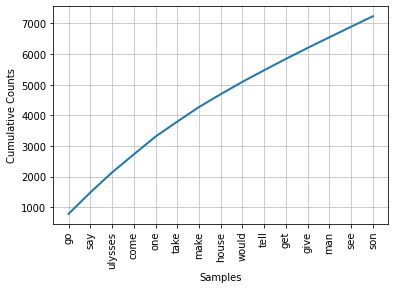

In [16]:
from nltk import FreqDist

# create a FreqDist
fdist = FreqDist(tokens)

# calculate % of first 15 word tokens
total = 0
for i in fdist.most_common(10):
    total += i[1]

print("\nThe first 10 words constitute the {:.2%} of the text ({} words).\n".format(total / len(tokens), total))

# plot cumulative fdist
fdist.plot(15, cumulative=True);

We can see that the token __"ulysses" is the $3rd$ most frequent word of the text__. That makes sense as it __the name of the protagonist__ (the Latin version of 'Odysseus'). 

We can examine this word token a bit more, by checking __how much space takes relative to the whole text__ as well as finding out __how many times exactly appears__.

The word token "ulysses" constitutes 1.31% of text and it appears 655 times.

The 10 most common words are:

     go     say ulysses    come     one    take    make   house   would    tell 
    780     699     655     589     581     489     476     421     403     379 


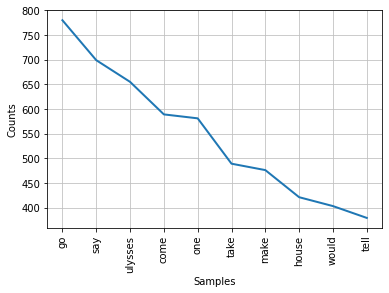

In [17]:
print("The word token \"{}\" constitutes {:.2%} of text and it appears {} times.\n"
      .format(fdist.most_common()[2][0], fdist.most_common()[0][1] / len(tokens), fdist.most_common()[2][1]))

# tabulate fdist
print(f"The 10 most common words are:\n")
fdist.tabulate(10)

# plot fdist
fdist.plot(10);

We can also find the __hapaxes__ of the text, i.e., words that appear only once. Many times, hapaxes represent very __interesting and rarely-used words__.

In [18]:
# find hapaxes
word_hapaxes = list({w for w in fdist.hapaxes()})

print(f"There are {len(word_hapaxes)} words that appears only once in the text.\n\n\
The first 20 hapaxes are:\n\n{word_hapaxes[:20]}")

There are 2448 words that appears only once in the text.

The first 20 hapaxes are:

['deficient', 'idæus', 'alcandra', 'survive', 'frustrate', 'circumstance', 'ἰστοπόδη', 'boiling', 'hoof', 'islet', 'science', 'college', 'beached', 'merge', 'thine', 'gathering', 'eurytion', 'foothold', 'malconsiglio', 'detach']


In addition to hapaxes, __long words__ usually can give the "tone" of a text pretty well and are an interesting aspect to examine.

In [19]:
# find long freq words
long_hapaxes = [w for w in word_hapaxes if len(w) > 13]
print(f"There are {len(long_hapaxes)} hapaxes that are longer than 13 characters:\n\n{long_hapaxes}.\n")

long_common = [w for w in set(tokens) if len(w) > 13]
print(f"There are {len(long_common)} word tokens that are longer than 13 characters:\n\n{long_common}.")

There are 15 hapaxes that are longer than 13 characters:

['unenforceability', 'inextinguishable', 'representation', 'straightforwardly', 'simultaneously', 'disrespectfully', 'identification', 'extraordinarily', 'nonproprietary', 'scholasticised', 'pyriphlegethon', 'merchantability', 'notwithstanding', 'circumnavigation', 'discouragement'].

There are 21 word tokens that are longer than 13 characters:

['inextinguishable', 'laestrygonians', 'pyriphlegethon', 'notwithstanding', 'circumnavigation', 'representation', 'redistribution', 'disrespectfully', 'identification', 'extraordinarily', 'scholasticised', 'interpretation', 'discouragement', 'electronically', 'unenforceability', 'contemptuously', 'straightforwardly', 'simultaneously', 'accomplishment', 'nonproprietary', 'merchantability'].


Now "___pyriphlegethon___" is indeed an insteresting word and if you are curious to __find out what/who is it__ click [here](https://www.theoi.com/Khthonios/PotamosPyriphlegethon.html)!

<a name="vectorization"></a>
# 3. Vectorization

I tried both __BoW and tf-idf__ methods, and they had exactly the same results, so I decided to stick with the latter (although it is more expensive).

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# instatiate vectorizer
tfidf = TfidfVectorizer(min_df=3, max_df=0.85)

# apply cv to text
data_tfidf = tfidf.fit_transform(tokens)

In [25]:
import pandas as pd

# convert data to array
tfidf_vectorized_array = data_tfidf.toarray()

# create a BoW matrix
tfidf_df = pd.DataFrame(tfidf_vectorized_array, columns=tfidf.get_feature_names())

# check first 5 rows
tfidf_df.head()

,abide,able,abode,abound,abroad,absence,absent,abundance,accept,access,...,yield,yoke,yoked,yonder,young,younger,youth,zacynthus,zeus,καὶ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a name="modelling"></a>
# 4. Topic Classification with Unsupervised Learning
1. [LDA](#LDA)
2. [NMF](#NMF)
3. [SVD](#SVD)

We will use three different models, although most of the __focus would be on the LDA model__. Thus, we will perform __hyperparameter optimization__ only for LDA, and we will just __compare the results with the other two models__. 

Most of the code in the section below comes from [this](https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/) amazing article by [Selva Prabhakaran](https://www.machinelearningplus.com/author/selva86/).

<a name="LDA"></a>
## 4.1 Latent Dirichlet Allocation
1. [Hyperparameter Optimization](#gs)
1. [Setup & Training](#train)
1. [Visualization](#vis)

<a name="gs"></a>
### 4.1.1 Hyperparameter Optimization

Instead of trying to find the best number of `n_components` parameter manually, we will use [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and let it find the best value for us.

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation

# define hyperparameters
search_params = {'n_components': [5, 10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# instantiate LDA
lda = LatentDirichletAllocation(learning_method="online")

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_tfidf)

GridSearchCV(estimator=LatentDirichletAllocation(learning_method='online'),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [5, 10, 15, 20, 25, 30]})

In [24]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_tfidf))

Best Model's Params:  {'learning_decay': 0.9, 'n_components': 5}
Best Log Likelihood Score:  -89089.65838017475
Model Perplexity:  1217.2044692087995


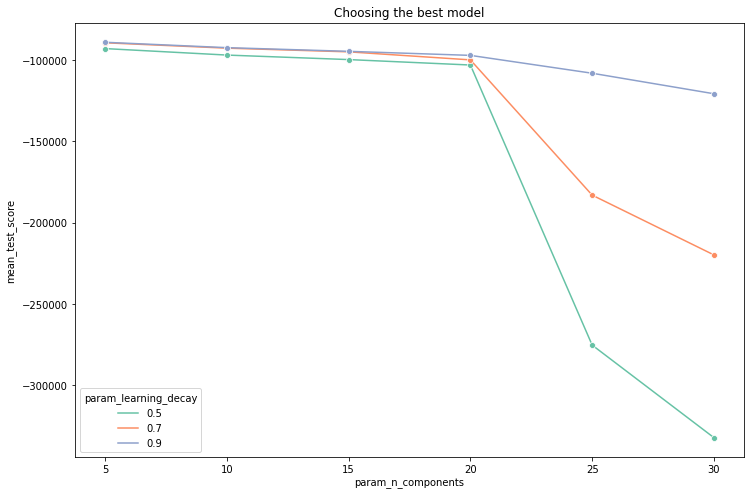

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

results = pd.DataFrame(model.cv_results_)

current_palette = sns.color_palette("Set2", 3)

plt.figure(figsize=(12,8))

sns.lineplot(data=results,
            x='param_n_components',
            y='mean_test_score',
            hue='param_learning_decay',
            palette=current_palette,
            marker='o'
)
plt.title("Choosing the best model")
plt.show()

<a name="train"></a>
As it shown in the graph above, we can see that $5$ seems the best value for the `n_components` parameter as well as that both $0.7$ and $0.9$ values for the `learning_decay` parameter have the exactly same result.

In [27]:
from sklearn.decomposition import LatentDirichletAllocation
# instantiate LDA
lda_model = LatentDirichletAllocation(n_components=5,
                                      evaluate_every=0,
                                      learning_decay=.9)

# train model
lda_Z = lda_model.fit_transform(data_tfidf)

In [28]:
print(f"Number of tokens: {lda_Z.shape[0]}\n\nNumber of topics: {lda_Z.shape[1]}\n")
print(f"Training lasted: {lda_model.n_iter_} iterations.\n\nNumber of features seen during training: {lda_model.n_features_in_}")
print(f"\nPerplexity score: {round(lda_model.bound_, 2)}.")

Number of tokens: 59672

Number of topics: 5

Training lasted: 10 iterations.

Number of features seen during training: 2596

Perplexity score: 1217.53.


We can check the results in a concise, __tabulated format__.

In [30]:
import numpy as np

# show top n keywords for each topic
def show_topics(vectorizer=tfidf, lda_model=lda_model, n_words=10):
    # extract full list of token names
    keywords = np.array(tfidf.get_feature_names())
    # create emtpy list
    topic_keywords = []
    # iterate and extract the weights associated with each topic
    for topic_weights in lda_model.components_:
        # extract key words
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=tfidf, lda_model=lda_model, n_words=20)     

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+ str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+ str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,come,house,telemachus,father,could,shall,leave,back,day,old,find,even,woman,round,away,water,first,another,lay,servant
Topic 1,go,ulysses,make,son,men,ship,good,suitor,let,sea,heaven,well,kill,answer,among,many,hold,end,penelope,wine
Topic 2,say,would,may,upon,much,know,way,people,also,time,two,place,keep,never,saw,begin,return,country,sit,wind
Topic 3,take,get,man,god,great,jove,long,like,bring,till,speak,minerva,look,send,must,thus,think,without,might,thing
Topic 4,one,tell,give,see,hand,home,set,still,work,though,put,therefore,every,ithaca,want,head,island,gutenberg,lie,project


<a name="vis"></a>
We can also __visualize our topics__ via the pyLDAvis library.

In [31]:
import pyLDAvis.sklearn
import warnings
warnings.filterwarnings("ignore")

pyLDAvis.enable_notebook()

panel = pyLDAvis.sklearn.prepare(lda_model, data_tfidf, tfidf, mds='tsne')
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      150.222153  -72.269554       1        1  20.804450
3       51.163364 -159.968018       2        1  20.124059
2      -73.144554   21.523815       3        1  19.977409
0      -66.410133 -110.606438       4        1  19.823481
4       54.417324   12.443444       5        1  19.270602, topic_info=         Term        Freq       Total Category  logprob  loglift
966        go  720.000000  720.000000  Default  30.0000  30.0000
1939      say  669.000000  669.000000  Default  29.0000  29.0000
2379  ulysses  605.000000  605.000000  Default  28.0000  28.0000
1555      one  575.000000  575.000000  Default  27.0000  27.0000
409      come  567.000000  567.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
1052    heard   67.442439   68.200635   Topic5  -5.0553   1.6354
708    enough   67.442439   68.200635   Topic5  -5.0553   1.6354
397     close   62.497969   63.256166   Topic5  -5.1314   1.6345
1692     poor   62.497969   63.256166   Topic5  -5.1314   1.6345
2368      try   62.497969   63.256166   Topic5  -5.1314   1.6345

[180 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
60        5  0.982396  alcinous
73        3  0.994866      also
83        1  0.995384     among
94        4  0.997641   another
95        1  0.991779    answer
...     ...       ...       ...
2545      4  0.992198      word
2547      5  0.993156      work
2555      3  0.997011     would
2585      2  0.994594       yet
2590      2  0.996471     young

[150 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1, 5])

<a name="NMF"></a>
## 4.2 Non-Negative Matrix Factorization

In [44]:
from sklearn.decomposition import NMF

# instantiate NMF
nmf_model = NMF(n_components=5, init='nndsvd')

# train model
nmf_Z = nmf_model.fit_transform(data_tfidf)

In [45]:
print(f"Number of tokens: {nmf_Z.shape[0]}\nNumber of topics: {nmf_Z.shape[1]}")

Number of tokens: 59672
Number of topics: 5


In [70]:
topic_keywords = show_topics(vectorizer=tfidf, lda_model=nmf_model, n_words=20)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+ str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+ str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,go,take,make,would,tell,house,get,give,man,see,son,men,ship,telemachus,god,may,upon,hand,good,suitor
Topic 1,say,take,make,house,would,son,men,ship,telemachus,may,god,hand,home,let,shall,day,much,way,jove,like
Topic 2,ulysses,get,give,see,man,men,god,upon,hand,good,father,suitor,shall,people,back,great,know,long,still,find
Topic 3,come,take,make,would,son,men,ship,upon,telemachus,may,good,home,leave,let,day,jove,back,heaven,like,work
Topic 4,one,take,make,would,house,son,men,telemachus,home,may,leave,let,much,shall,day,way,jove,like,bring,old


<a name="SVD"></a>
## 4.3 Singular Value Decomposition

In [67]:
from sklearn.decomposition import TruncatedSVD

# instantiate TSVD
lsi_model = TruncatedSVD(n_components=5)

# train model
lsi_Z = lsi_model.fit_transform(data_tfidf)

print(f"Number of tokens: {lsi_Z.shape[0]}\nNumber of topics: {lsi_Z.shape[1]}")

Number of tokens: 59672
Number of topics: 5


In [69]:
topic_keywords = show_topics(vectorizer=tfidf, lda_model=lsi_model, n_words=20)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+ str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+ str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,go,god,hand,men,see,give,man,son,take,telemachus,home,may,get,good,shall,leave,way,let,day,ulysses
Topic 1,say,men,ship,get,would,suitor,son,make,may,telemachus,tell,hand,house,people,home,sea,father,know,back,answer
Topic 2,ulysses,would,may,ship,tell,telemachus,make,suitor,house,god,son,say,men,back,upon,could,people,father,good,sea
Topic 3,come,men,get,son,suitor,ship,make,may,give,sea,see,say,let,back,set,way,ulysses,man,still,bring
Topic 4,one,come,men,son,get,may,make,give,suitor,home,let,hand,say,father,way,day,know,ulysses,back,people


<a name="conc"></a>
# 5. Conclusions

I could infer __some sort of a relationships with some of the topics only from the LDA model__. The results from the other two models include a lot of __overlapping words__, so I couldn't relate any particular characteristic to any of the 5 topics.

1. __Topic 0__ seems to be centered around __Penelope__ (the wife of Odysseus) as it contains words such as "wife", "bed", "lay", "woman", "mother", and "men", among others.
2. __Topic 1__ hints a relation with __Telemachus__ (the son of Odysseus and Penelope). The words "away", "father", "penelope", and "kill" could be related with him travelling away to find his father and being involved in the Trojan war.
3. __Topic 4__ must be related with __Odysseus__ as it has words like "Ulysseus", "return", "old", "home", "son", "ship", and "sea" which hint towards the return of him back to Ithaca by sea and the return to his old home.

For __Topics 2 and 3__ I couldn't infer any kind of relationship.